In [1]:
#导入所需要的库
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取数据文件
# Read data file
spc = pd.read_csv('../data/05 share-of-population-with-cancer.csv')
dbr = pd.read_csv('../data/08 disease-burden-rates-by-cancer-types.csv')
cdr = pd.read_csv('../data/09 cancer-deaths-rate-and-age-standardized-rate-index.csv')

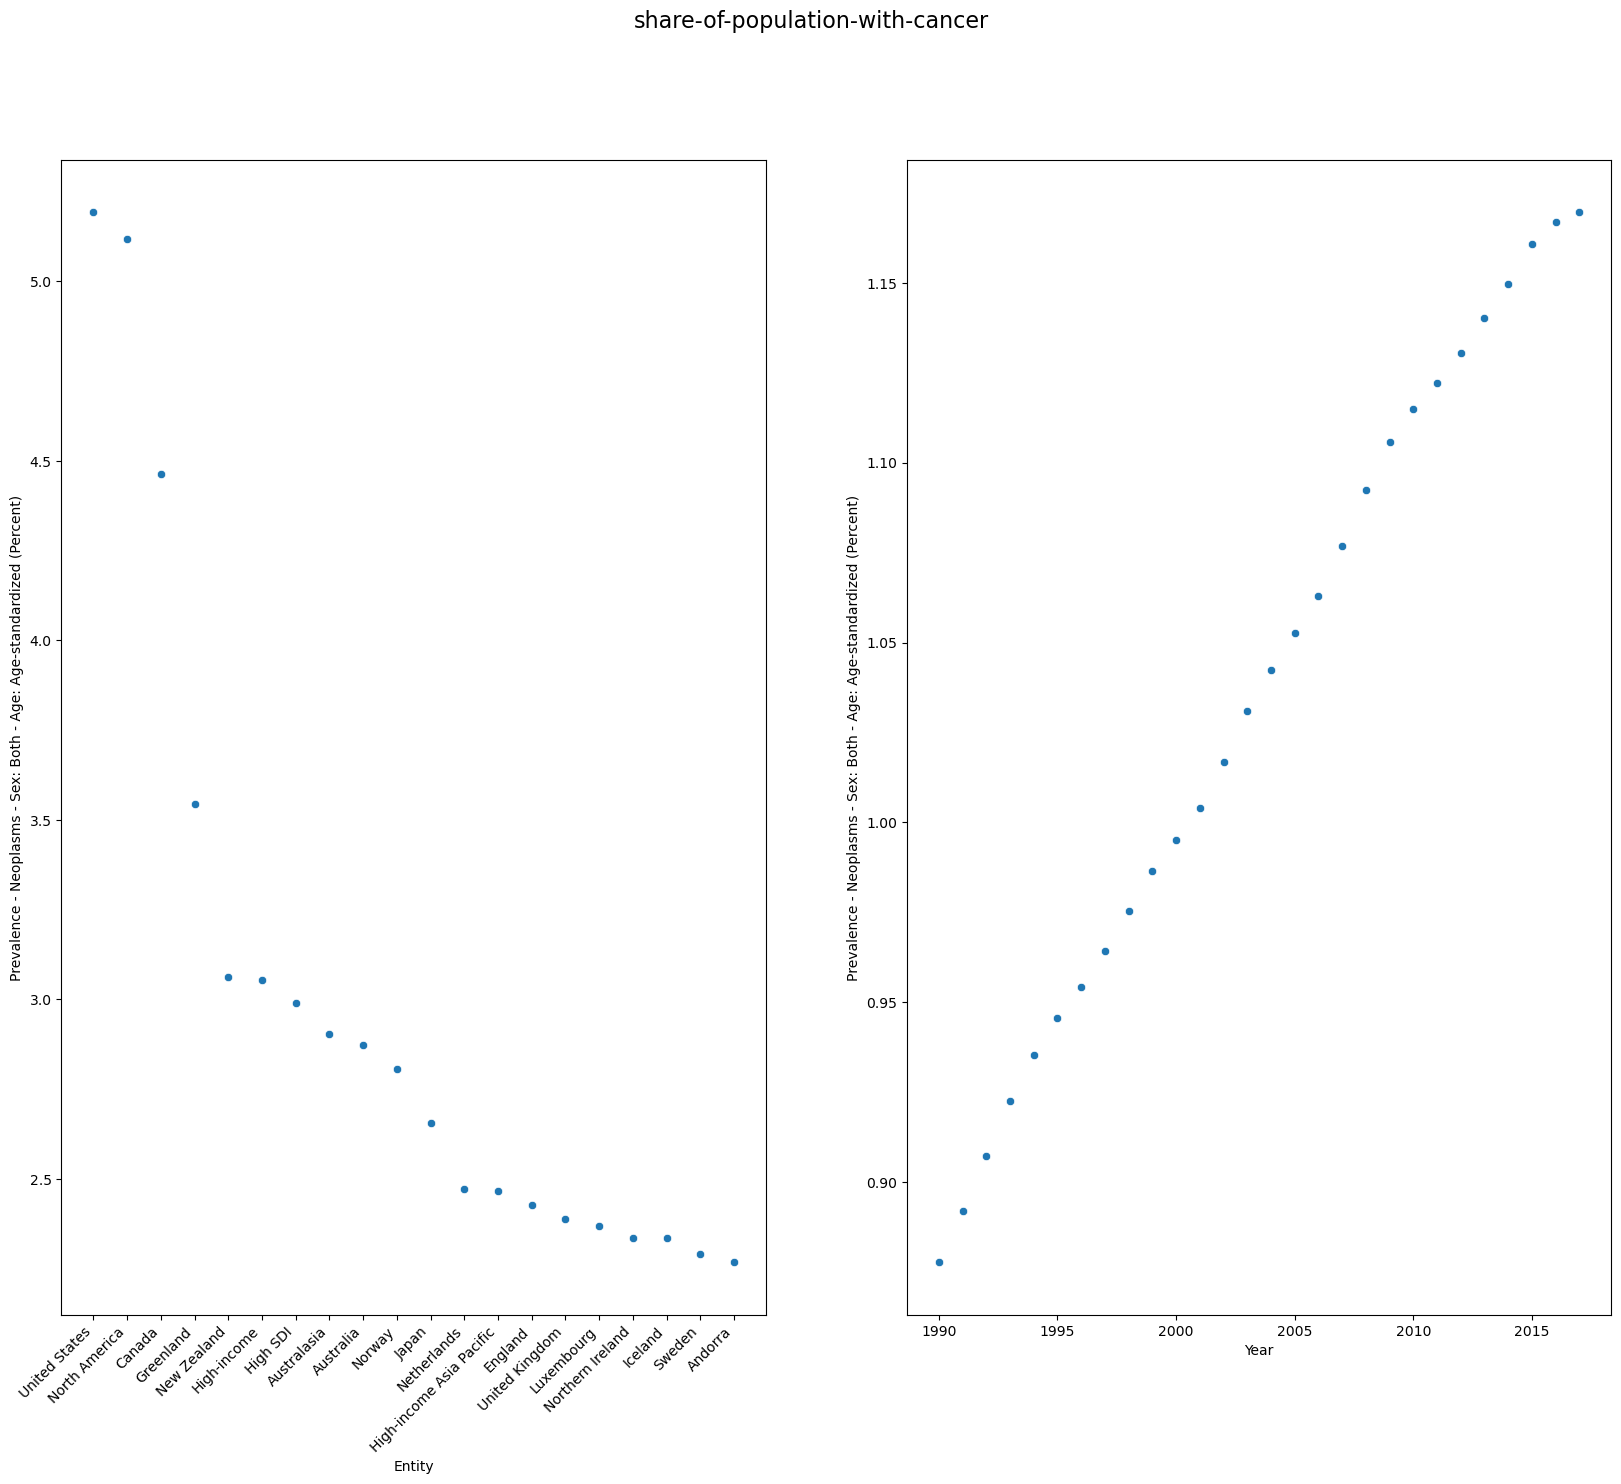

In [3]:
#从1990到2019年间，癌症人口比例总数最多的前20个组织或国家地区以及所有组织以及国家地区的癌症人口比例的平均值的变化
# Changes in the average cancer population proportions of the top 20 organizations or countries with the highest cancer population proportions from 1990 to 2019, as well as the average changes for all organizations and countries.
spc_eaverage = spc.groupby('Entity').mean(numeric_only = True).sort_values(by = 'Prevalence - Neoplasms - Sex: Both - Age: Age-standardized (Percent)' , ascending = False )[:20]
spc_yaverage = spc.groupby('Year').mean(numeric_only = True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
sns.scatterplot(data = spc_eaverage , x = 'Entity' , y =  'Prevalence - Neoplasms - Sex: Both - Age: Age-standardized (Percent)' , ax = axes[0])
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
sns.scatterplot(data = spc_yaverage ,x = 'Year' , y = 'Prevalence - Neoplasms - Sex: Both - Age: Age-standardized (Percent)' , ax = axes[1])
fig.suptitle('share-of-population-with-cancer' , fontsize=16)
fig.savefig('../figure/f1 average of share-of-population-with-cancer' , dpi = 500 )

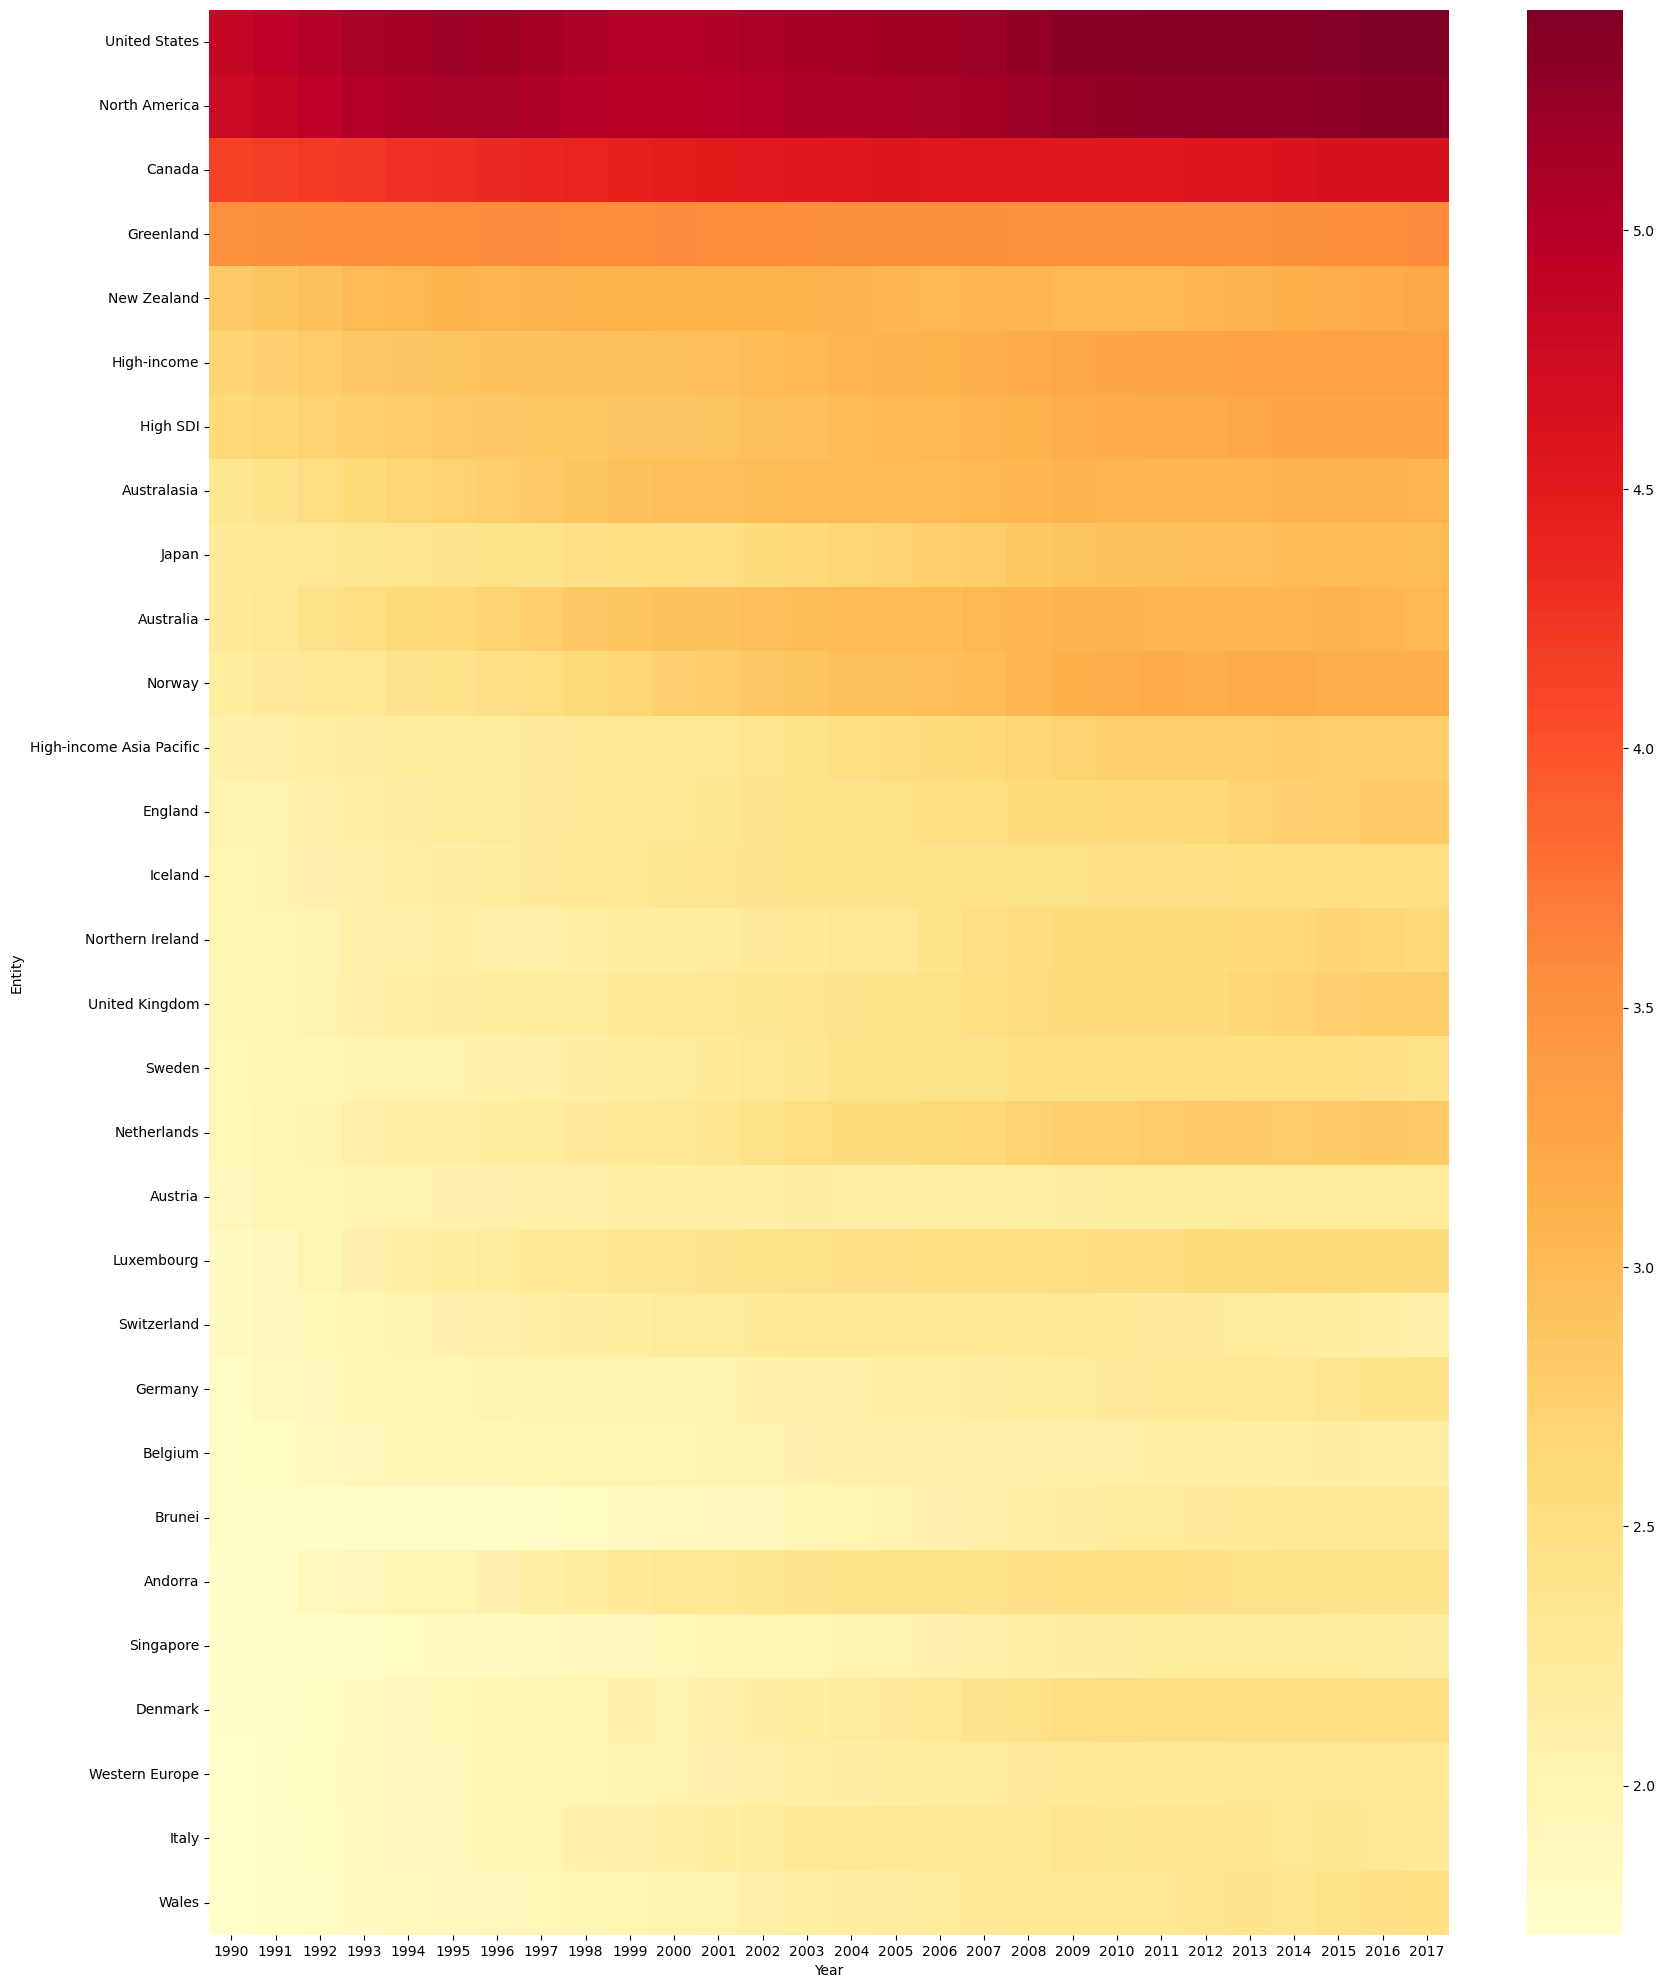

In [4]:
#数据处理，取1990~2019年间癌症人口比例总数的前三十个组织或国家地区
# Data processing to select the top thirty organizations or countries with the highest cancer population proportions from 1990 to 2019
heatspc = spc.pivot(index = 'Entity' , columns = 'Year' , values = 'Prevalence - Neoplasms - Sex: Both - Age: Age-standardized (Percent)')
heatspc_sorted = heatspc.sort_values(by=1990, axis=0, ascending=False)[:30]
heatspc_sorted
#绘制热图
# Plot a heatmap
plt.figure(figsize = (20,25))
sns.heatmap(heatspc_sorted , cmap = 'YlOrRd')
plt.savefig('../figure/f2 heatmap_top 30 of share-of-population-with-cancer' , dpi = 500 )

In [5]:
#各个国家平均按癌症类型划分的疾病负担率
# Disease burden rates averaged across different cancer types, categorized by country
dbr_averyear = dbr.groupby('Year').mean(numeric_only = True)
nescol = [col.split('-')[2].strip() for col in dbr_averyear.columns]
dbr_averyear.columns = nescol

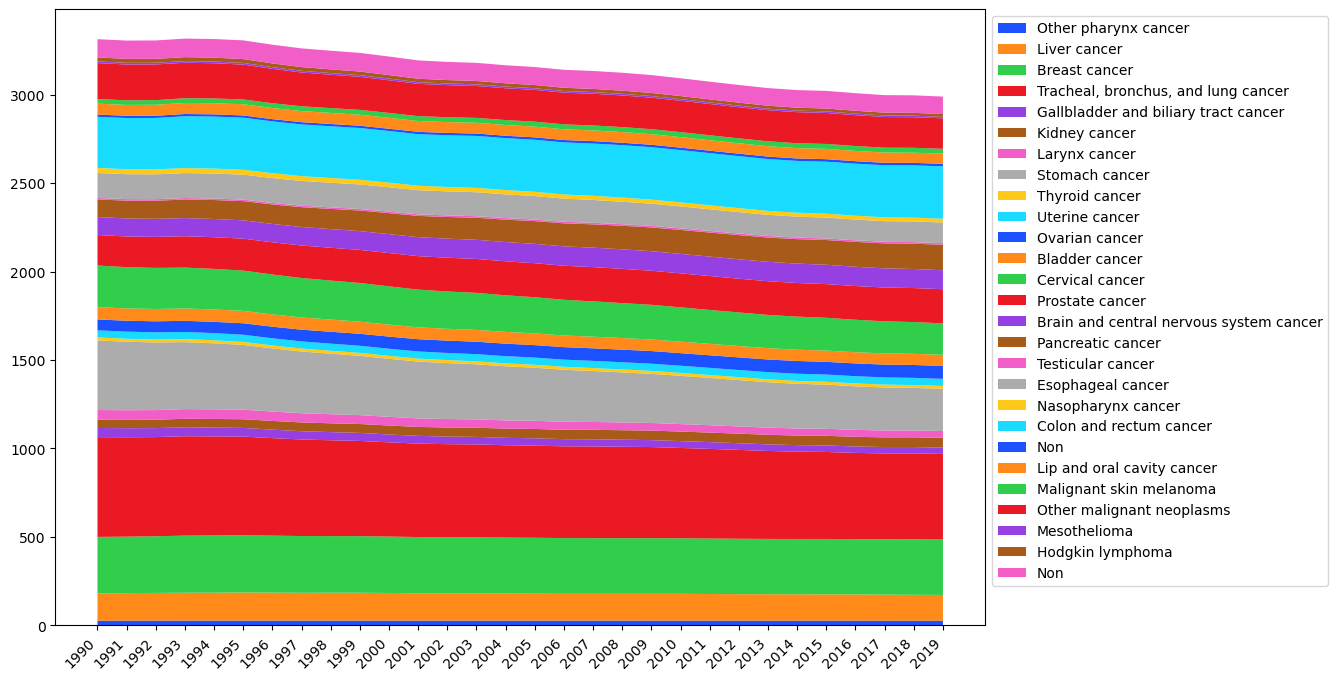

In [6]:
#绘制不同癌症1990~2019年间对所有国家的平均疾病负担率的堆积图
# Plot a stacked graph of the average disease burden rates for different cancers across all countries from 1990 to 2019
plt.figure(figsize=(12, 8))
year = dbr_averyear.index
num_colors = 30 
colors = sns.color_palette("bright", n_colors=num_colors)
plt.stackplot(year, dbr_averyear.values.T, labels = dbr_averyear.columns ,colors=colors , alpha=0.9)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(year, rotation=45, ha='right')
plt.savefig('../figure/f3 stackplot of disease-burden-rates-by-cancer-types' , dpi = 500 )

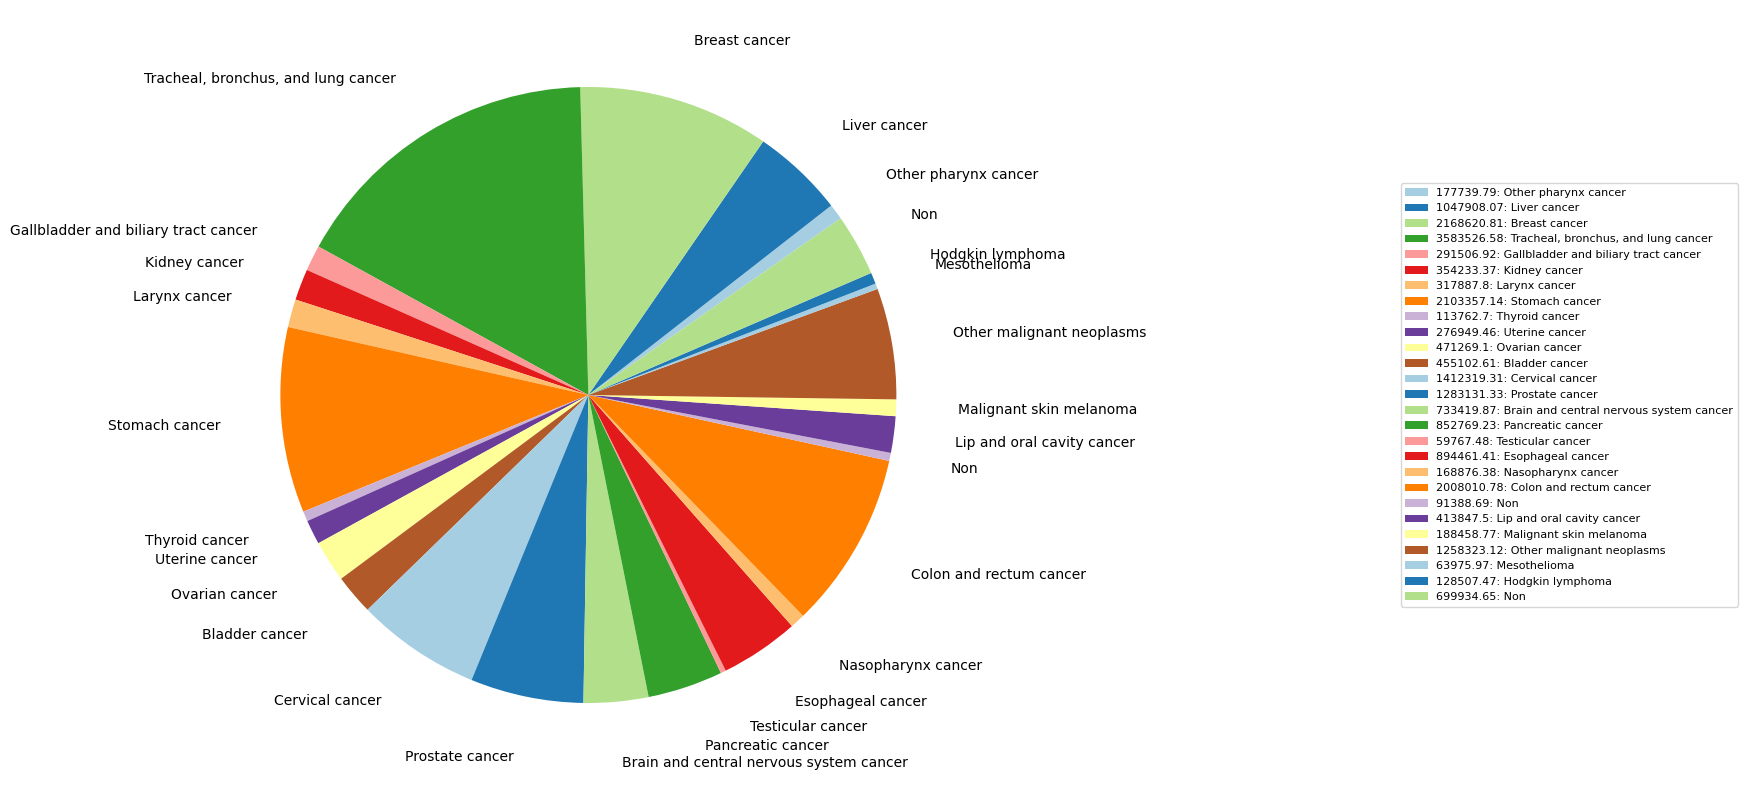

In [7]:
#绘制不同癌症1990~2019年间对所有国家的总疾病负担率的饼图
# Plot a pie chart of the overall disease burden rates for different cancers across all countries from 1990 to 2019
dbr_totalyear = dbr.groupby('Year').sum(numeric_only = True)
dbr_totalyear = dbr_totalyear.sum(axis = 0)
dbr_totalyear = dbr_totalyear.round(2)
nescol = [col.split('-')[2].strip() for col in dbr_totalyear.keys()]
dbr_totalyear = dbr_totalyear.rename(index=dict(zip(dbr_totalyear.index, nescol)))
plt.figure(figsize=(25, 10))
plt.pie(dbr_totalyear.values, labels=list(dbr_totalyear.keys()),startangle=35, pctdistance=0.86, colors=plt.cm.Paired.colors ,labeldistance=1.2)
custom_legend = [f'{label}: {value}' for label, value in zip(dbr_totalyear.values, list(dbr_totalyear.keys()))]
plt.legend(custom_legend, bbox_to_anchor=(2,0.5), loc="center right", fontsize=8)
plt.tight_layout
plt.savefig('../figure/f4 total of disease-burden-rates-by-cancer-types' , dpi = 500 )
plt.show()

In [8]:
#各个国家的平均癌症死亡率和年龄标准化率和死亡总数
#Average cancer death rate, age-standardized rate, and total number of deaths for each country
cdr__averyear = cdr.groupby('Year').mean(numeric_only = True)

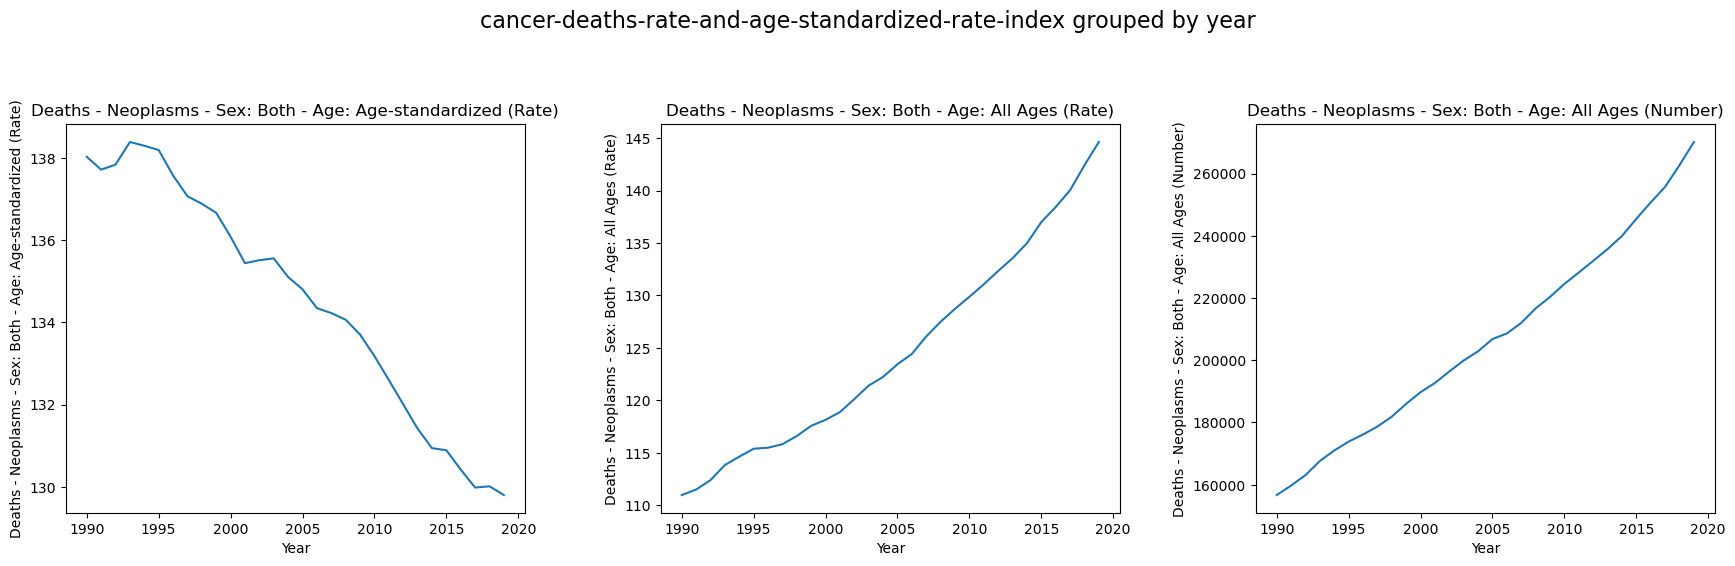

In [9]:
#各个国家的平均癌症死亡率和年龄标准化率和死亡总数的折线图
#Line chart of the average cancer death rate, age-standardized rate, and total number of deaths for each country.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
totaly = cdr__averyear.columns
for i, ax in enumerate(axes):
    sns.lineplot(data=cdr__averyear[totaly[i]], ax=ax)
    ax.set_title(totaly[i])
fig.suptitle('cancer-deaths-rate-and-age-standardized-rate-index grouped by year', fontsize=16)
fig.tight_layout(pad=3.0)
fig.savefig('../figure/f5 cancer-deaths-rate-and-age-standardized-rate-index grouped by year' , dpi = 500 )

In [10]:
#总死亡数前二十的国家或组织
#Top twenty countries or organizations by total number of deaths.
cdr_total = cdr.groupby('Entity').mean(numeric_only = True)
cdr_totalpart = cdr_total.sort_values(by = 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)' , ascending = False)[:20]

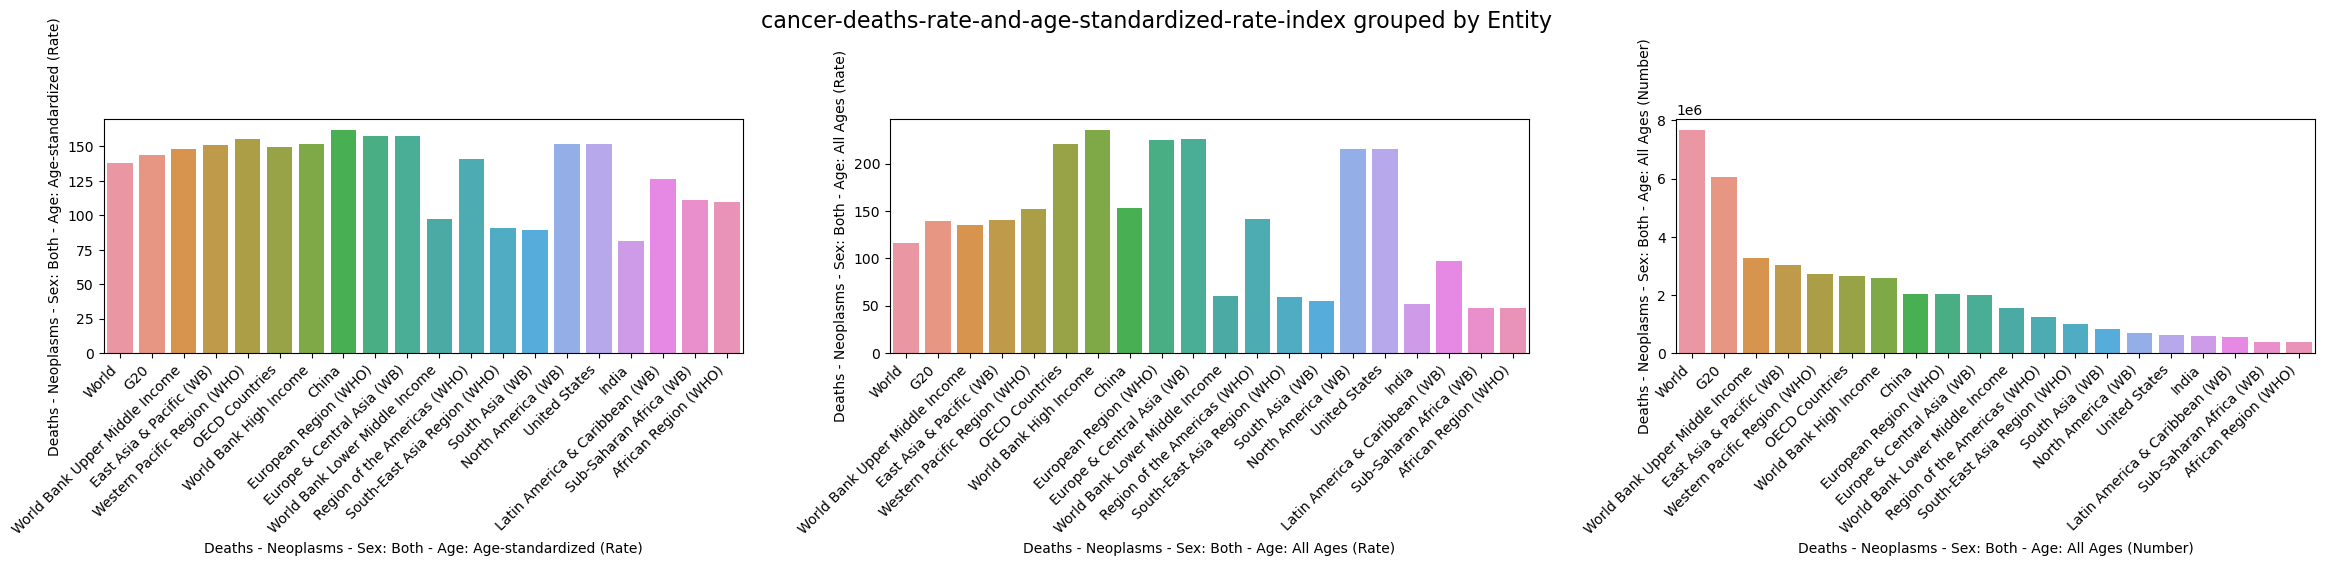

In [11]:
#总死亡数前二十的国家或组织的条形图
#Bar chart of the top twenty countries or organizations by total number of deaths.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
totaly = cdr_totalpart.columns[1:]
for i, ax in enumerate(axes):
    sns.barplot(data = cdr_totalpart,x = cdr_totalpart.index ,y=totaly[i], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel(totaly[i])
fig.suptitle('cancer-deaths-rate-and-age-standardized-rate-index grouped by Entity', fontsize=16)
fig.tight_layout(pad=3.0)
fig.savefig('../figure/f6 cancer-deaths-rate-and-age-standardized-rate-index grouped by Entity' , dpi = 500 )